In [10]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pickle
import seaborn as sns

In [6]:
with open("../KGE-baselines/RGCN/RGCN-precision-recall.pkl", "rb") as f:
    RGCN_res = pickle.load(f)
with open("../KGE-baselines/TuckER/TuckER-precision-recall.pkl", "rb") as f:
    TuckER_res = pickle.load(f)
with open("../KGE-baselines/dglke/TransE_l2-precision-recall.pkl", "rb") as f:
    TransE_res = pickle.load(f)
with open("../KGE-baselines/dglke/DistMult-precision-recall.pkl", "rb") as f:
    DistMult_res = pickle.load(f)
with open("../KGE-baselines/dglke/ComplEx-precision-recall.pkl", "rb") as f:
    ComplEx_res = pickle.load(f)
with open("../HiRES-2.0-Graph/HAN-linear-precision-recall.pkl", "rb") as f:
    HAN_linear_res = pickle.load(f)
with open("../HiRES-2.0-Graph/HAN-TransE-precision-recall.pkl", "rb") as f:
    HAN_transE_res = pickle.load(f)
with open("../HiRES-2.0-Graph/HAN-TuckER-precision-recall.pkl", "rb") as f:
    HAN_TuckER_res = pickle.load(f)
with open("../HiRES-2.0-Text/SciBERT-linear-precision-recall.pkl", "rb") as f:
    SciBERT_linear_res = pickle.load(f)
with open("../HiRES-2.0-Text/SciBERT-TuckER-precision-recall.pkl", "rb") as f:
    SciBERT_TuckER_res = pickle.load(f)
with open("../HiRES-2.0-BiModal/result/pretrained-BERT-TuckER-text-precision-recall.pkl", "rb") as f:
    BERT_TuckER_text_res = pickle.load(f)
with open("../HiRES-2.0-BiModal/result/pretrained-BERT-TuckER-graph-precision-recall.pkl", "rb") as f:
    BERT_TuckER_graph_res = pickle.load(f)

data_baseline = {
    "TransE":TransE_res,
    "DistMult":DistMult_res,
    "ComplEx":ComplEx_res,
    "RGCN":RGCN_res, 
    #"TuckER":TuckER_res,
    "REMOD-OKD(Text)":BERT_TuckER_text_res,
    "REMOD-OKD(Graph)":BERT_TuckER_graph_res,
}

data_graph = {
    "SciBERT(linear)":SciBERT_linear_res,
    "SciBERT(TuckER)":SciBERT_TuckER_res,
    "REMOD-OKD":BERT_TuckER_text_res,
}

data_text = {
    "HAN(linear)":HAN_linear_res,
    "HAN(transE)":HAN_transE_res,
    "HAN(TuckER)":HAN_TuckER_res,
    "REMOD-OKD":BERT_TuckER_graph_res,
}


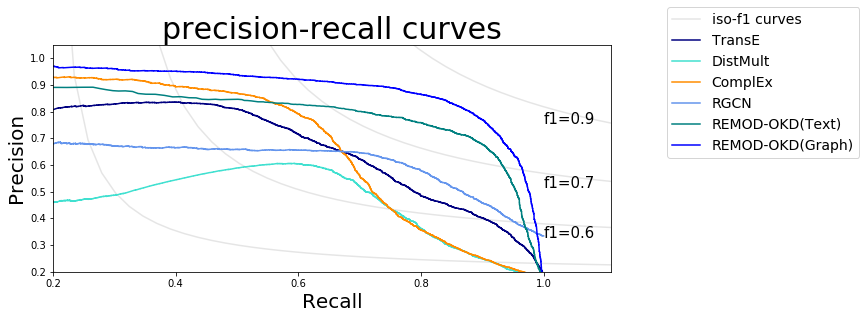

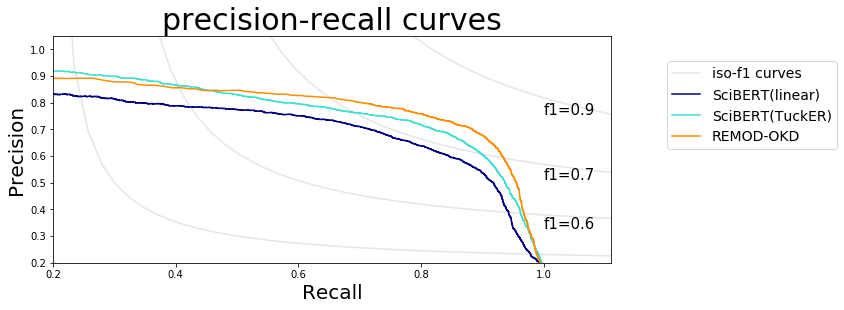

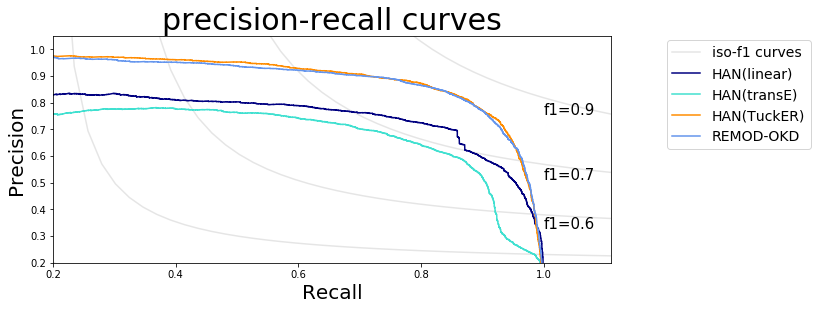

In [12]:
for data in (data_baseline, data_graph, data_text):
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','blue','red', 'black','green','darkgreen'])
    plt.figure(figsize=(10, 5))
    f_scores = np.linspace(0.2, 0.9, num=5)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1.11)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(1, y[45]-0.05),size=15)

    lines.append(l)
    labels.append('iso-f1 curves')

    for (name, each),color in zip(data.items(),colors):
        l, = plt.plot(each["recall"], each["precision"], color=color, lw=1.5)
        lines.append(l)
        labels.append(name)

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.2, 1.11])
    plt.ylim([0.2, 1.05])
    plt.xlabel('Recall', size=20)
    plt.ylabel('Precision', size=20)
    plt.title('precision-recall curves',size=30)
    plt.legend(lines, labels, loc=(1.1, 0.5), prop=dict(size=14))
    plt.show()